In [2]:
# Import dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import os

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt
from datetime import date

# Reflect Tables into SQLAlchemy ORM
--------------


In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# Reflect the existing database into a new model
Base = automap_base()

# Reflect the tables into ORM class
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis
-------

**PRECIPITATION ANALYSIS**

In [ ]:
# Want the dataset for the last 12 months in the database
# Query the most recent date in the database
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

In [ ]:
# Perform a query to retrieve the data and precipitation scores

# Create variable to store beginning date of last 12 months' data
start_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Want to query for date and prcp 
sel = [Measurement.date, Measurement.prcp]
precip_totals = session.query(*sel).\
    filter(Measurement.date >= start_date).\
    order_by(Measurement.date).all()
precip_totals

In [ ]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip_totals, columns = ['date', 'prcp'])
precip_df.set_index('date', inplace=True)

# Drop 'NaN' values
precip_df = precip_df.dropna()

# Rename 'prcp' column to 'Precipitation'
precip_df = precip_df.rename(columns=({"prcp": "Precipiation"}))

# Sort the dataframe by date
precip_df = precip_df.sort_index()

# Preview dataframe
precip_df

In [ ]:
# Graph the above dataframe
# First need to alter matplotlib parameters

# Get current size
fig_size = plt.rcParams["figure.figsize"]

# Print out current plot size
print("Current size:", fig_size)

# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

In [ ]:
# Use Pandas Plotting with Matplotlib to plot the data

# Rotate x-axis tick marks, change font size, and remove 'date' on x-axis
precip_df.plot(rot=45, fontsize=18)
plt.xlabel("")

# Add legend and specify font size
plt.legend(fontsize='xx-large')

plt.show()

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

**STATION ANALYSIS**

In [ ]:
#dinking around, can delete later
#session.query(func.count(Measurement.station)).all()
#session.query(Measurement.date).order_by(Measurement.date).first()
#session.query(Measurement.date).order_by(Measurement.date.desc()).first()
#today = date.today()
#query_date = today - dt.timedelta(days=365)
#print("Query Date: ", query_date)
#session.query(func.sum(Measurement.prcp)).group_by(Measurement.station).all()
#sel = [Measurement.station,
       #func.sum(Measurement.prcp)]
#precip_totals = session.query(*sel).\
    #filter(func.strftime("%Y", Measurement.date) == '2013').\
    #group_by(Measurement.station).\
    #order_by(Measurement.station).all()
#precip_totals
#precip_totals = session.query(*sel).\
#    filter(Measurement.date == query_date).\
#    group_by(Measurement.station).\
#    order_by(Measurement.station).all()
#precip_totals
#print("Today's Date: ", today)

In [ ]:
# Design a query to show how many stations are available in this dataset
total_stations = session.query(func.count(Station.station)).all()
total_stations

In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

# Create variable to store row counts for each station
totals = func.count(Measurement.station)

# Query for station row counts and store into variable 'results'
results = session.query(Measurement.station, totals).\
    group_by(Measurement.station).\
    order_by(totals.desc()).all()
results

In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station

tobs_19281 = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

# Print out results from above in more readable format
print("Station USC00519281:")
print("Min temp:", tobs_19281[0][0])
print("Max temp:", tobs_19281[0][1])
print("Avg temp:", tobs_19281[0][2])

In [ ]:
# HISTOGRAM CODE
# Want to create a histogram, looking at 12-month tobs data for Station USC00519281

# Query to find the most recent date for station 'USC00519281'
last_date = session.query(Measurement.date).\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.date.desc()).first()
last_date

In [ ]:
# Create start date variable based off last_date found above
start_date = dt.date(2017, 8, 18) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date, Measurement.tobs]
tobs_data = session.query(*sel).\
    filter(Measurement.date >= start_date).\
    filter(Measurement.station == 'USC00519281').all()
tobs_data

In [ ]:
# Create dataframe of tobs_data query
tobs_df = pd.DataFrame(tobs_data)
tobs_df

In [ ]:
# Because I resized the default graph size for Date/Prcp, need to resize for histogram
fig_size = plt.rcParams["figure.figsize"]

# Tells me what my current fig size is
print("Current size:", fig_size)

# Set figure width to 8 and height to 6
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

In [ ]:
# Plot histogram with bins=12
plt.hist(tobs_df['tobs'], bins=12)
plt.xlabel('Temp (Farenheit)')
plt.ylabel('Frequency')
plt.title("Station USC00519281 Temp Obs. Data \n"
          "(08/18/2016 - 08/18/2017)")
plt.show()

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

    
TMIN = func.min(Measurement.tobs)
TAVE = func.avg(Measurement.tobs)
TMAX = func.max(Measurement.tobs)

def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.

    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """

    
    return session.query(TMIN, TAVE, TMAX).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# Function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# Function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

vacay_results = calc_temps('2016-12-15', '2016-12-28')
vacay_results

In [ ]:
vacay_temps = calc_temps('2016-01-15', '2016-12-28')
vacay_df = pd.DataFrame(vacay_temps[0])
vacay_df

In [ ]:
TMAX = vacay_df.iloc[2,0]
TMIN = vacay_df.iloc[0,0]
error = TMAX - TMIN
error

In [ ]:
print(vacay_df.iloc[2,0])
TAVE = vacay_df.iloc[1,0]
TAVE

In [ ]:
vacay_df.index=['TMIN', 'TAVE', 'TMAX']
vacay_df

In [ ]:
vacay_df = vacay_df.rename_axis('Stats')
vacay_df

In [ ]:
TMAX = vacay_df.iloc[2,0]
TMIN = vacay_df.iloc[0,0]
error = TMAX - TMIN
TAVE = vacay_df.iloc[1,0]

In [ ]:
fig, ax = plt.subplots()
df = pd.DataFrame({"TAVE": [TAVE], "Error": [error]})
meansum = df["TAVE"]
stdsum = df["Error"]

plot = meansum.plot(kind='bar', yerr=stdsum, colormap='RdPu', edgecolor='black',\
                    title = "Trip Avg Temp", grid=False, figsize=(4,7),\
                    ax=ax,position=0.45,error_kw=dict(ecolor='black',elinewidth=1.5),width=0.8)
plt.ylabel("Temp (F)")
ax.yaxis.grid(True, which='major', linestyle='-', linewidth=1.5)
plt.show()

In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

# Optional: Other Recommended Analyses
------

**TEMPERATURE ANALYSIS I**

In [ ]:
# Want to determine if there's a statistically meaningful difference btwn temps in June & December
# First, find avg temp in June & December for all stations, all years

june = "06"

all_june = session.query(func.avg(Measurement.tobs)).all()
           #filter(func.strftime("%m", Measurement.date) == june).all()
all_june
#all_june[0][0]

In [ ]:
testing = session.query(Measurement.tobs, Measurement.date).\
          filter(func.strftime("%m", Measurement.date) == june).all()
testing

In [ ]:
testing = pd.DataFrame(testing, columns=['tobs', 'date'])
testing.head()

In [ ]:
june = "06"

all_june = session.query(func.avg(Measurement.tobs)).\
           filter(func.strftime("%m", Measurement.date) == june).all()
all_june[0][0]

In [ ]:
june = "06"

def june_avg(tobs):
    sel = [func.avg(Measurement.tobs, Measurement.date)]
    return session.query(*sel).filter(func.strftime("%m", Measurement.date) == june).all()
june_avg

**TEMP ANALYSIS II**

In [11]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

# Create variables to store queried tobs data    
TMIN = func.min(Measurement.tobs)
TAVE = func.avg(Measurement.tobs)
TMAX = func.max(Measurement.tobs)

def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.

    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """

    return session.query(TMIN, TAVE, TMAX).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# Function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [12]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

vacay_temps = calc_temps('2016-12-17', '2016-12-29')
vacay_df = pd.DataFrame(vacay_temps[0])
vacay_df.index=['TMIN', 'TAVE', 'TMAX']
vacay_df

,0
TMIN,67.000000
TAVE,72.638554
TMAX,78.000000


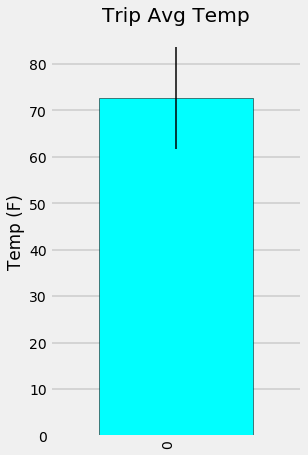

In [19]:
# Plot the min, avg, and max temperature from your previous query as a bar chart
# Use the average temperature as the bar height
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

TMAX = vacay_df.iloc[2,0]
TMIN = vacay_df.iloc[0,0]
error = TMAX - TMIN
TAVE = vacay_df.iloc[1,0]

fig, ax = plt.subplots()
df = pd.DataFrame({"TAVE": [TAVE], "Error": [error]})
tave = df["TAVE"]
stdsum = df["Error"]

plot = t.plot(kind='bar', yerr=stdsum, colormap='cool', edgecolor='black',\
                    title = "Trip Avg Temp", grid=False, figsize=(4,7),\
                    ax=ax,position=0.45,error_kw=dict(ecolor='black',elinewidth=1.5),width=0.8)
plt.ylabel("Temp (F)")
ax.yaxis.grid(True, which='major', linestyle='-', linewidth=1.5)
plt.show()

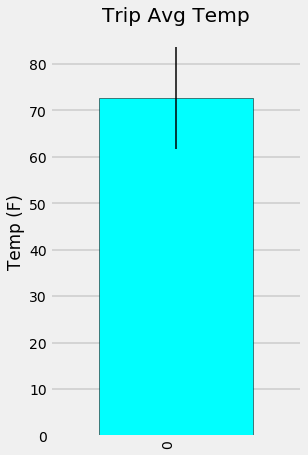

In [17]:
fig, ax = plt.subplots()
df = pd.DataFrame({"TAVE": [TAVE], "Error": [error]})
meansum = df["TAVE"]
stdsum = df["Error"]

plot = meansum.plot(kind='bar', yerr=stdsum, colormap='cool', edgecolor='black',\
                    title = "Trip Avg Temp", grid=True, figsize=(4,7),\
                    ax=ax,position=0.45,error_kw=dict(ecolor='black',elinewidth=1.5),width=0.8)
plt.ylabel("Temp (F)")
ax.yaxis.grid(True, which='major', linestyle='-', linewidth=1.5)
plt.show()

**DAILY RAINFALL AVERAGE**

In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous yr's matching dates
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

# Set vacation start date and end date with most recent data
start_date = dt.date(2016, 12, 17)
end_date = dt.date(2016, 12, 29)


# Querry from both datasets to find total rainfall at each station for vacation dates
sel = [Station.name, Measurement.station, Station.latitude, Station.longitude,\
       Station.elevation, func.sum(Measurement.prcp)]
precip_totals = session.query(*sel).\
    filter(Measurement.date >= start_date).\
    filter(Measurement.date <= end_date).\
    filter(Measurement.station == Station.station).\
    group_by(Measurement.station).all()

# Preview
precip_totals

In [ ]:
# Put into dataframe
precip_df = pd.DataFrame(precip_totals, columns=["Name", "Station", "Latitude",\
                                                 "Longitude", "Elevation", "Precipitation"])
precip_df

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date

In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

In [ ]:
# Plot the daily normals as an area plot with `stacked=False`